# Catalysts

<iframe src="https://www.youtube.com/embed/Qa2DW4aXVaw" style="width:45%;height:350px;"></iframe>

<iframe src="https://www.youtube.com/embed/GLpbh5d3Hhg" style="width:45%;height:350px;"></iframe>

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Firm, Tactful, and above all Sound_: the stringent criteria Sir Arnold seeks in his successor. At its core, this encapsulates the ability to ask the right questions. The dialogue, with its wry humor, encodes the entire series, presenting the Oxford network’s service to The Crown as parallel to Oligarchy in *Miller's Crossing*, as Casper views it: The question of _Friendship, Character, and above all Ethics_.
```




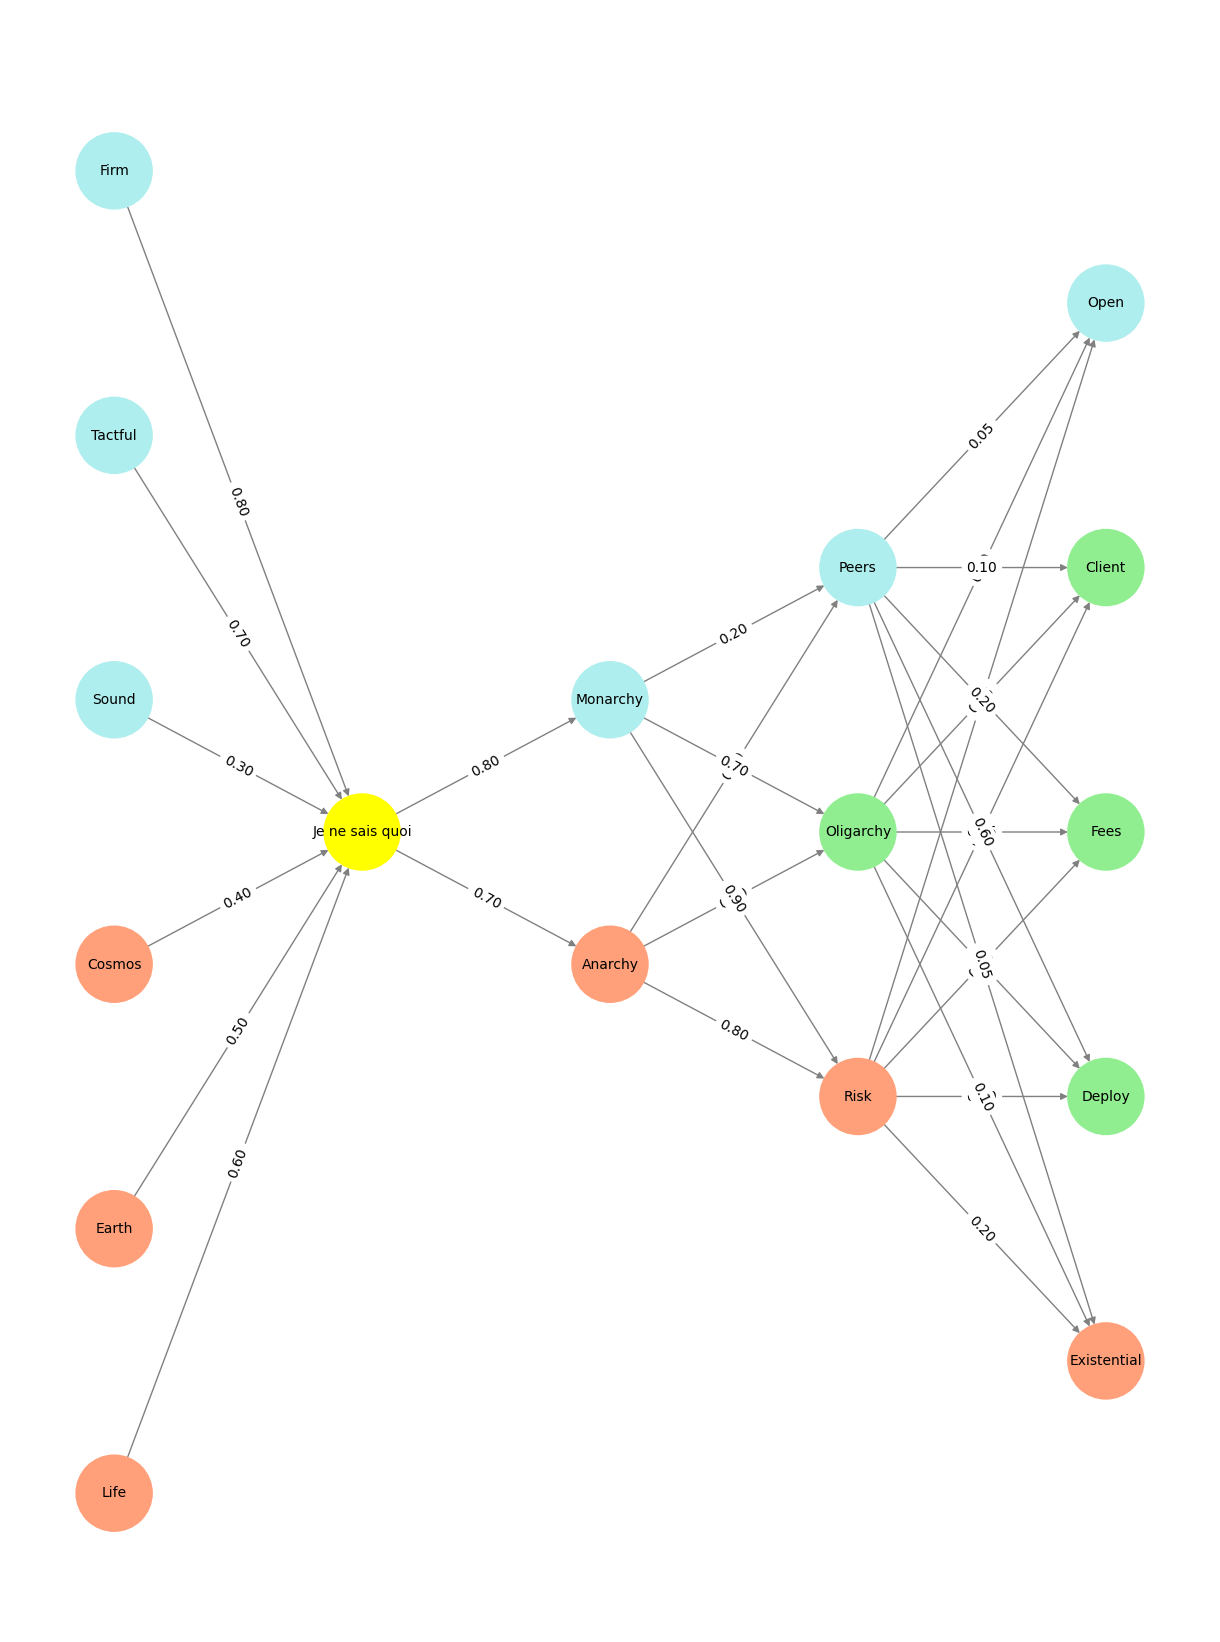

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Je ne sais quoi'],
        'Input': ['Anarchy', 'Monarchy'],
        'Hidden': [
            'Risk',
            'Oligarchy',
            'Peers',
        ],
        'Output': ['Existential', 'Deploy', 'Fees', 'Client', 'Open',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Je ne sais quoi':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Monarchy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Peers':
            return 'paleturquoise'
        elif node == 'Oligarchy':
            return 'lightgreen'
        elif node == 'Risk':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Open':
            return 'paleturquoise'
        elif node in ['Client', 'Fees', 'Deploy']:
            return 'lightgreen'
        elif node == 'Existential':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Je ne sais quoi or Latent Variable_. This is an *a priori* node that compresses "a lot"
```